# *Predicting Employee Attririon*

### Here we will Analyse Employee churn.Why employees are leaving the company. Predict who will leave the company

Employee churn can be affected by salary, work conditions, job satisfaction, tenure, growth potential. There are many advantages of retaining a employee rather than hiring new one. Like hiring new employees has its cost like hiring and training cost. New employee also will take some time to attain the similar skills as the experience employee. 

Because of the above reasons its important to retain valuable employees. We are going to predict the reason for leaving the company. We will use machine learning models to predict who are the employees who are at higher risk of leaving. This will give a valuable input to the company as to what are the steps to be taken to retain the employee and who are at risk of leaving

### Exploratory Data Analysis 

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline

In [130]:
employee_data = pd.read_csv('HR_comma_sep.csv')

In [131]:
employee_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [132]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [133]:
print(employee_data['Departments '].unique())
print(employee_data.salary.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


#### **The attributes in detail as:**
*satisfaction_level: It is employee satisfaction point, which ranges from 0-1.<br>
last_evaluation: It is evaluated performance by the employer, which also ranges from 0-1.<br>
number_projects: How many numbers of projects assigned to an employee?<br>
average_monthly_hours: How many average numbers of hours worked by an employee in a month?<br>
time_spent_company: time_spent_company means employee experience. The number of years spent by an employee in the company.<br>
work_accident: Whether an employee has had a work accident or not.<br>
promotion_last_5years: Whether an employee has had a promotion in the last 5 years or not.<br>
Departments: Employee's working department/division.<br>
Salary: Salary level of the employee such as low, medium and high.<br>
left: Whether the employee has left the company or not.<br>*

In [134]:
employee_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [135]:
print(employee_data.left.value_counts()/len(employee_data)*100)

0    76.191746
1    23.808254
Name: left, dtype: float64


The percentage of people who left the company is 23%

In [136]:
employee_data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


*As we can see above employees who left the company has low satisfaction level, worked more hours and has low promotion rate*

## Data Visualization

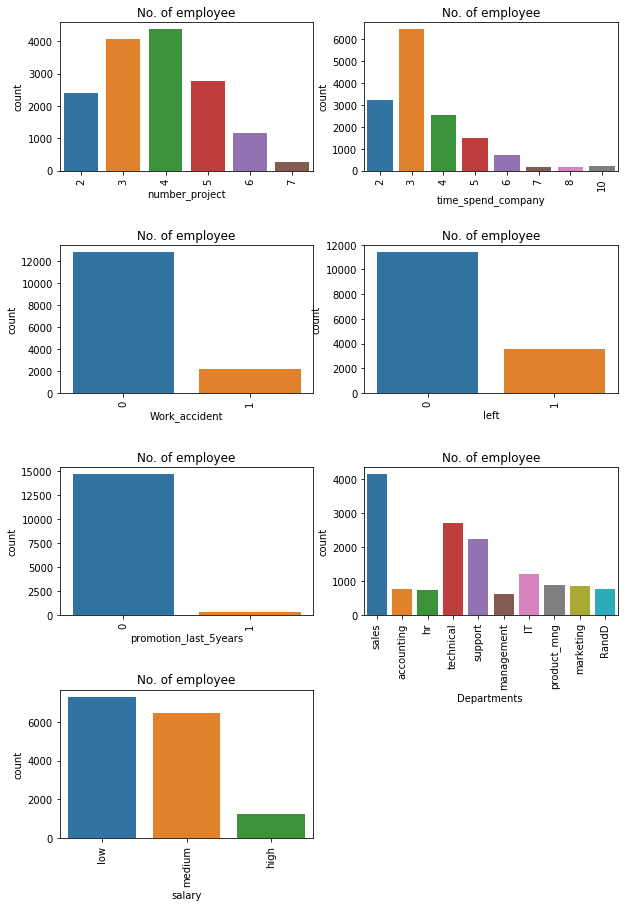

In [137]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.countplot(x=j,data = employee_data)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

*As we can see above the number of projects is generally 3-4 <br>*
*The number of promotions last 5 years is very less<br>*
*Most of the employees are in the sale department<br>*
*Most of the salary are in the range low to medium*


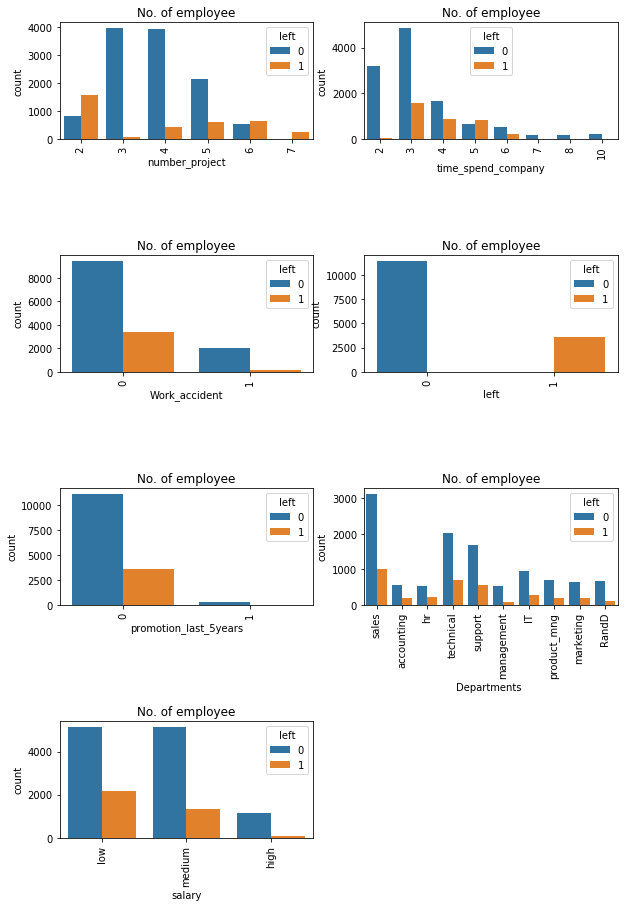

In [138]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = employee_data, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

*As the number of projects is 6-7 employees left are more<br>*
*when a person spends 5 years in a company there are more chances of him leaving<br>*
*People who dint get promotions left the company more<br>*
*More number of people in low salary range left the company*

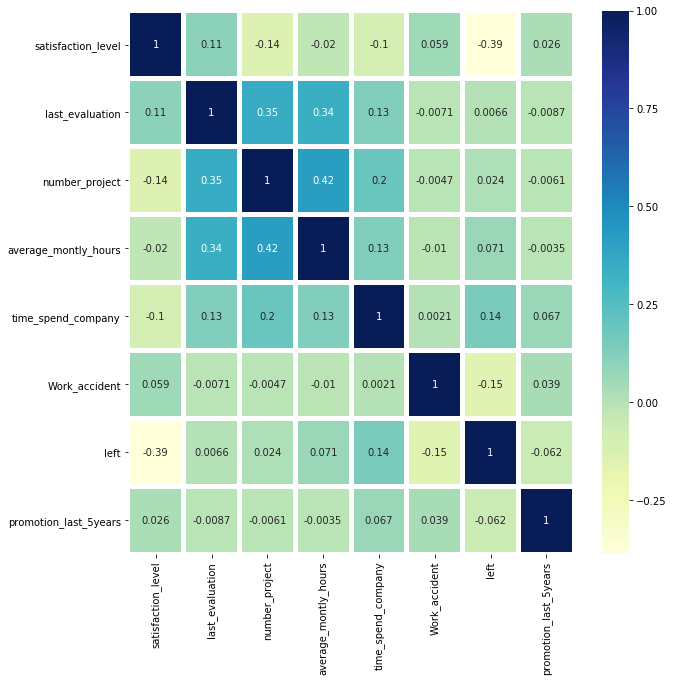

In [139]:
corr_matrix = employee_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu",linewidths=4.0)
plt.show()

*Looking at the correlation matrix we can see that the for the people who left the company the highest negative correlation is with satisfation level. WHich implies as satisfaction level increases number of people who left the company decreases*

## Cluster Analysis

In [140]:
from sklearn.cluster import KMeans
left_emp =  employee_data[['satisfaction_level', 'last_evaluation']][employee_data.left == 1]
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

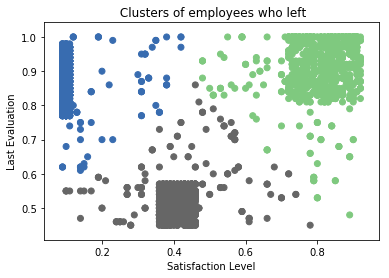

In [141]:
left_emp['label'] = kmeans.labels_
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title(' Clusters of employees who left')
plt.show()

**There are three categories of employees<br>**
*High satisfaction and high performance<br>*
*Low satisfaction and high performance<br>*
*Low satisfation and low performance<br>*

## Model Building

### Label enoding

In [177]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
employee_data['salary']=le.fit_transform(employee_data['salary'])
employee_data['Departments ']=le.fit_transform(employee_data['Departments '])

### Splitting to training and test data set

In [178]:
y=employee_data.left
X = employee_data.drop('left',axis=1) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Fitting the data to model and predicting using Decision Tree

I use decision tree because i need to understand the features which is driving the employees to leave. This decision tree helps me to understand this. Its helps to understand the feature importance

In [179]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
depth = [i for i in range(5,21,1)]
samples = [i for i in range(50,500,50)]
parameters = dict(max_depth=depth, min_samples_leaf=samples)
param_search = GridSearchCV(dt, parameters)
param_search.fit(X_train, y_train)
print(param_search.best_params_)

{'max_depth': 6, 'min_samples_leaf': 50}


In [180]:
dt1 = DecisionTreeClassifier(random_state=42,max_depth=6,min_samples_leaf=50)
dt1.fit(X_train, y_train)
y_dt_pred = dt1.predict(X_test)

In [181]:
feature_importances = dt1.feature_importances_
feature_list = list(X)
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])
relative_importances.sort_values(by="importance", ascending=False)

,importance
satisfaction_level,0.569480
last_evaluation,0.145304
time_spend_company,0.136982
number_project,0.091423
average_montly_hours,0.056164
Departments,0.000647
Work_accident,0.000000
promotion_last_5years,0.000000
salary,0.000000


In [182]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_dt_pred))
print("Precision:",metrics.precision_score(y_test, y_dt_pred))
print("Recall:",metrics.recall_score(y_test, y_dt_pred))

Accuracy: 0.9635555555555556
Precision: 0.9468503937007874
Recall: 0.8973880597014925


### Fitting the data to model and predicting using Gradient Boost

In [183]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

In [184]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9715555555555555
Precision: 0.958252427184466
Recall: 0.9207089552238806


## Conclusion

**Employees are leaving because of low salary, low promotion rate, higher number of projects and whose expereince is close to 5 <br>**
**We have identified the different clusters of employees<br>**
**We have identified the most important feature as satisfaction level from correlation matrix and also from decision tree <br>**
**Also we have built a model with good accuracy and precision indicating that the model can accuractely predict if the employee will leave the company or not<br>**